# Gas Turbine measurements data processing  
In this notebook, a raw dataset of sensor measurements of a gas turbine is processed for use in fault prediction, control, and forecasting ... 
> _Note:_ The data is in txt format it needs to be converts to a csv format for better and easy handling.

1. Getting the data ready 
2. Convert test files to CSV format
3. Explore CSV files 
4. Converting object data to useful data-types 
5. Filtering the data 

In [1]:
## Import modules
# uncomment this line to install packages
#!pip install pandas numpy matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

## A.  Getting the data ready
0. Explore the data  manually 
1. Get the list of the dataset names 
2. Rename each dataset by its proper name 
3. Convert the TXT  data to CSV format 
4. Rename data column labels 

### 1. Get the list of the dataset names

In [2]:
## Define data necessary paths 
raw_data_path =  "../data/raw_data"

if not os.path.isdir("../data/csv_files"):
    os.mkdir("../data/csv_files")
csv_data_path = "../data/csv_files"

if not os.path.isdir("../data/renamed_files"):
    os.mkdir("../data/renamed_files")
renamed_files_path = "../data/renamed_files" 

if not os.path.isdir("../data/ready_data"):
    os.mkdir("../data/ready_data")    
ready_data_path = "../data/ready_data"


In [3]:
#print the list of TXT files within raw data path
file_list1 = os.listdir(raw_data_path) 
txt_files = [f for f in file_list1 if f.lower().endswith(".txt")]
txt_files

['a26bj1a.txt',
 'a26bj1b.txt',
 'a26bj2a.txt',
 'a26bj2b.txt',
 'a26bt1.txt',
 'a26btaa.txt',
 'a26cbj1.txt',
 'a26cbj2.txt',
 'a26ptab.txt',
 'cp.txt',
 'cpd.txt',
 'ctd.txt',
 'ctim.txt',
 'fdd.txt',
 'fddd.txt',
 'fdddd.txt',
 'fdddddd.txt',
 'fddddddd.txt',
 'fdddddddd.txt',
 'l28fd.txt',
 'l28fdd.txt',
 'ptviba.txt',
 'ptvibtc3.txt',
 's.txt',
 'ss.txt',
 'tc1bb1.txt',
 'tc1bb2.txt',
 'tc1bbh1.txt',
 'tc1bbl1.txt',
 'tnh!1.txt',
 'tnh2.txt',
 'tnhar.txt',
 'tnhh.txt',
 'tnl.txt',
 'tnla.txt',
 'ttxm - Copy.txt']

### 2. Rename each dataset by its proper name

In [4]:
#1.  Rename the files function 
def rename_files(file_list):
    """
    this function renames all the txt file with their proper name
    :param path: the path of the txt data files
    :return: None
    """
    file_names = file_list 

    for txt_file in file_names:
        src_file = raw_data_path+'/'+ txt_file
        with open(raw_data_path + '/' + txt_file, 'r') as f:
            lines = f.readline().replace('\n', '')
            new_filename = lines.split('\\')[-1].replace('.', '_')
            print("Renaming: ", file_names.index(txt_file)+1, new_filename)
            dst_file = os.path.join(renamed_files_path, new_filename + '.txt')
            shutil.copy(src_file, dst_file) 
        #os.rename(raw_data_path + '/' + txt_file, raw_data_path + '/' + new_filename + '.txt') 
    

In [5]:
rename_files(txt_files)

Renaming:  1 T1_A26BJ1A
Renaming:  2 T1_A26BJ1B
Renaming:  3 T1_A26BJ2A
Renaming:  4 T1_A26BJ2B
Renaming:  5 T1_A26BTI
Renaming:  6 T1_A26BTAA
Renaming:  7 T1_A26CBJ1
Renaming:  8 T1_A26CBJ2
Renaming:  9 T1_A26BTAB
Renaming:  10 T1_CPR
Renaming:  11 T1_CPD
Renaming:  12 T1_CTD
Renaming:  13 T1_CTIM
Renaming:  14 T1_FD_INTENS_3
Renaming:  15 T1_FD_INTENS_4
Renaming:  16 T1_FD_INTENS_5
Renaming:  17 T1_FD_INTENS_6
Renaming:  18 T1_FD_INTENS_7
Renaming:  19 T1_FD_INTENS_8
Renaming:  20 T1_L28FDA
Renaming:  21 T1_L28FDB
Renaming:  22 T3_PTVIB_A
Renaming:  23 T3_PTVIB_B
Renaming:  24 T1_TTWS1FI
Renaming:  25 T1_TTWS1AO
Renaming:  26 T1_BB1
Renaming:  27 T1_BB2
Renaming:  28 T1_BBH1
Renaming:  29 T1_BBL1
Renaming:  30 T1_TNH1
Renaming:  31 T1_TNH2
Renaming:  32 T1_TNHAR
Renaming:  33 T1_TNH
Renaming:  34 T1_TNL
Renaming:  35 T1_TNLA
Renaming:  36 T1_TTXM


### 3. Convert the TXT data to CSV format

In [6]:
## Convert txt file to csv files function
def convert_to_csv(path):

    # Get a list of all files and directories in the specified path
    file_list = os.listdir(path)
    # Filter only the text files (ending with ".txt")
    file_names = [f for f in file_list if f.lower().endswith(".txt")]
    for file_name in file_names:
        print("Converting: ", file_names.index(file_name)+1, file_name)
        with open(path + '/' + file_name, 'r') as f:
            lines = f.readlines()

        with open(path + '/' + file_name, 'w') as f:
            head = lines[3].replace('\t', ',')
            f.write(head)
            for line in lines[4:]:
                m_line = line.replace('\t', ',').replace(' ', ',')
                f.write(m_line)
        with open(path + '/' + file_name, 'r') as f:
            m_lines = f.readlines()
        #
        with open(csv_data_path + '/' + file_name[:-4] + '.csv', 'w') as csvfile:
            csvfile.writelines(m_lines)

In [7]:
convert_to_csv(renamed_files_path)

Converting:  1 T1_A26BJ1A.txt
Converting:  2 T1_A26BJ1B.txt
Converting:  3 T1_A26BJ2A.txt
Converting:  4 T1_A26BJ2B.txt
Converting:  5 T1_A26BTAA.txt
Converting:  6 T1_A26BTAB.txt
Converting:  7 T1_A26BTI.txt
Converting:  8 T1_A26CBJ1.txt
Converting:  9 T1_A26CBJ2.txt
Converting:  10 T1_BB1.txt
Converting:  11 T1_BB2.txt
Converting:  12 T1_BBH1.txt
Converting:  13 T1_BBL1.txt
Converting:  14 T1_CPD.txt
Converting:  15 T1_CPR.txt
Converting:  16 T1_CTD.txt
Converting:  17 T1_CTIM.txt
Converting:  18 T1_FD_INTENS_3.txt
Converting:  19 T1_FD_INTENS_4.txt
Converting:  20 T1_FD_INTENS_5.txt
Converting:  21 T1_FD_INTENS_6.txt
Converting:  22 T1_FD_INTENS_7.txt
Converting:  23 T1_FD_INTENS_8.txt
Converting:  24 T1_L28FDA.txt
Converting:  25 T1_L28FDB.txt
Converting:  26 T1_TNH.txt
Converting:  27 T1_TNH1.txt
Converting:  28 T1_TNH2.txt
Converting:  29 T1_TNHAR.txt
Converting:  30 T1_TNL.txt
Converting:  31 T1_TNLA.txt
Converting:  32 T1_TTWS1AO.txt
Converting:  33 T1_TTWS1FI.txt
Converting:  

### 4. Rename data column labels

In [8]:
##  Perform initial preprocessing (name columns ) 
# save processed datasets to "../data/ready_data" folder 

def name_colums(path):
    file_inpath = os.listdir(csv_data_path)
    csv_files = [f for f in file_inpath if f.lower().endswith(".csv")]
    new_column_names = ["Date", "Time", "Value"]
    for csv_file in csv_files:
        print("Processing file: ", csv_files.index(csv_file)+1, csv_file)
        new_column_names[-1] = csv_file[:-4]
        data = pd.read_csv(path + "/" + csv_file, on_bad_lines='skip')
        data = data.iloc[::-1]
        data = data.set_axis(new_column_names, axis=1)
        data.to_csv(ready_data_path + '/' + csv_file, index=False, header=True)
        #data = data = pd.read_csv(path + "/" + csv_file, on_bad_lines='skip')

In [9]:
name_colums(csv_data_path)

Processing file:  1 T1_A26BJ1A.csv
Processing file:  2 T1_A26BJ1B.csv
Processing file:  3 T1_A26BJ2A.csv
Processing file:  4 T1_A26BJ2B.csv
Processing file:  5 T1_A26BTAA.csv
Processing file:  6 T1_A26BTAB.csv
Processing file:  7 T1_A26BTI.csv
Processing file:  8 T1_A26CBJ1.csv
Processing file:  9 T1_A26CBJ2.csv
Processing file:  10 T1_BB1.csv
Processing file:  11 T1_BB2.csv
Processing file:  12 T1_BBH1.csv
Processing file:  13 T1_BBL1.csv
Processing file:  14 T1_CPD.csv
Processing file:  15 T1_CPR.csv
Processing file:  16 T1_CTD.csv
Processing file:  17 T1_CTIM.csv
Processing file:  18 T1_FD_INTENS_3.csv
Processing file:  19 T1_FD_INTENS_4.csv
Processing file:  20 T1_FD_INTENS_5.csv
Processing file:  21 T1_FD_INTENS_6.csv
Processing file:  22 T1_FD_INTENS_7.csv
Processing file:  23 T1_FD_INTENS_8.csv
Processing file:  24 T1_L28FDA.csv
Processing file:  25 T1_L28FDB.csv
Processing file:  26 T1_TNH.csv
Processing file:  27 T1_TNH1.csv
Processing file:  28 T1_TNH2.csv
Processing file:  2

C:\Users\Mazou\AppData\Local\Temp\ipykernel_14800\4051776965.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + "/" + csv_file, on_bad_lines='skip')


Processing file:  35 T3_PTVIB_A.csv
Processing file:  36 T3_PTVIB_B.csv


## B. Process data type 
1. Data inspection: obtain information about the data
2. convert object data to useful data types 


### 1. Data inspection: obtain information about the data

In [10]:
# get data names, and shapes
file_list2 = os.listdir(ready_data_path) 
csv_files = [f for f in file_list2 if f.lower().endswith(".csv")]
for csv_file in csv_files:
    df = pd.read_csv(ready_data_path +"/"+csv_file, on_bad_lines='skip', low_memory=False) 
    print(csv_file[:-4], "shape= ",df.shape)

T1_A26BJ1A shape=  (52607, 3)
T1_A26BJ1B shape=  (52835, 3)
T1_A26BJ2A shape=  (57648, 3)
T1_A26BJ2B shape=  (52475, 3)
T1_A26BTAA shape=  (66194, 3)
T1_A26BTAB shape=  (66082, 3)
T1_A26BTI shape=  (49730, 3)
T1_A26CBJ1 shape=  (58337, 3)
T1_A26CBJ2 shape=  (56983, 3)
T1_BB1 shape=  (1396, 3)
T1_BB2 shape=  (10729, 3)
T1_BBH1 shape=  (1842, 3)
T1_BBL1 shape=  (1034, 3)
T1_CPD shape=  (638, 3)
T1_CPR shape=  (463, 3)
T1_CTD shape=  (47421, 3)
T1_CTIM shape=  (461, 3)
T1_FD_INTENS_3 shape=  (137, 3)
T1_FD_INTENS_4 shape=  (137, 3)
T1_FD_INTENS_5 shape=  (137, 3)
T1_FD_INTENS_6 shape=  (137, 3)
T1_FD_INTENS_7 shape=  (137, 3)
T1_FD_INTENS_8 shape=  (137, 3)
T1_L28FDA shape=  (133, 3)
T1_L28FDB shape=  (133, 3)
T1_TNH shape=  (624, 3)
T1_TNH1 shape=  (1796, 3)
T1_TNH2 shape=  (1804, 3)
T1_TNHAR shape=  (136, 3)
T1_TNL shape=  (406, 3)
T1_TNLA shape=  (225, 3)
T1_TTWS1AO shape=  (136, 3)
T1_TTWS1FI shape=  (16730, 3)
T1_TTXM shape=  (341950, 3)
T3_PTVIB_A shape=  (1324, 3)
T3_PTVIB_B shape=

### 2. Convert object data to usful data types 

### 2.1 Remove flase data 

In [11]:
# function to process uknown time 
def remove_false_time(dataframe):
    '''
    This function removes the row that contains unknown time that can't be converted to timedelta 
    
    ARGUMENT: 
        dataframe: pandas dataframe 
    OUTPUT: 
        tuple  (dataframe, [index, false time]) 
    
    '''
    false_time = [] 
    print("Removing false time ...")
    for i in range(df.shape[0]):
        #print(i)
        try: 
            pd.to_timedelta(df['Time'][i])
           # print("done")
        except: 
            false_time.append((i,df['Time'][i]))
            df.drop(i, inplace=True)
            print("False time solved")
            continue  
    return (df, false_time)
    
#pd.to_timedelta(df['Time'][1])
#df['Time'][3]

### 2.2 Convert objects to pandas  datatypes 

In [12]:
# empty dectionary to store dataframes 
dataframes =  {} ; 
#function to convert the column data types to pandas datatypes 
#def convert_topd_datatypes(file_list):
for csv_file in csv_files: 
    print(f"Processing file {csv_files.index(csv_file) + 1} ... ")
    df = pd.read_csv(ready_data_path+ "/"+csv_file, on_bad_lines='skip') 
    (df,_) = remove_false_time(df)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y',errors='coerce')
        ## process TIME : 
    df['Time']  = pd.to_timedelta(df['Time'])
    df[csv_file[:-4]] = pd.to_numeric(df[csv_file[:-4]], errors='coerce')
    #df.to_csv(data_path_2 + '/' + file, index=False, header=True)
    dataframes[csv_file[:-4]] = df 

Processing file 1 ... 
Removing false time ...
Processing file 2 ... 
Removing false time ...
Processing file 3 ... 
Removing false time ...
Processing file 4 ... 
Removing false time ...
Processing file 5 ... 
Removing false time ...
Processing file 6 ... 
Removing false time ...
Processing file 7 ... 
Removing false time ...
False time solved
Processing file 8 ... 
Removing false time ...
Processing file 9 ... 
Removing false time ...
Processing file 10 ... 
Removing false time ...
Processing file 11 ... 
Removing false time ...
Processing file 12 ... 
Removing false time ...
Processing file 13 ... 
Removing false time ...
Processing file 14 ... 
Removing false time ...
Processing file 15 ... 
Removing false time ...
Processing file 16 ... 
Removing false time ...
Processing file 17 ... 
Removing false time ...
Processing file 18 ... 
Removing false time ...
Processing file 19 ... 
Removing false time ...
Processing file 20 ... 
Removing false time ...
Processing file 21 ... 
Removin

C:\Users\Mazou\AppData\Local\Temp\ipykernel_14800\829447851.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ready_data_path+ "/"+csv_file, on_bad_lines='skip')


Removing false time ...
Processing file 35 ... 
Removing false time ...
Processing file 36 ... 
Removing false time ...


## C. Filtering and orginise the data
1. Extracting information about the dates and times of the data
2. Extart how many samples per each day for each data
3. get the top most data according to the number of existing days

### 1 Extracting information about the dates and times of the data

In [13]:

df4 = dataframes[csv_files[4][:-4]]
df4['Date'][df4.shape[0]-1]
df4.shape[0]
len(set(df4['Date']))

308

In [14]:
## creating a dictionary to store the following information about the data frames: 
# first day, last day, number of days, and list of all days (a set)
dataframes_info = {} 
for df_key, df in dataframes.items(): 
    print("Processing", df_key, "...")
    #print(" -> First Day")
    first_day = df['Date'][df['Date'].index.start]; 
    #print(" -> Last Day")
    last_day = df['Date'][df['Date'].index.stop -1]
    #print(" -> all Day")
    all_days = set(df['Date'])
    #print(" -> num Day")
    num_days = len(set(df['Date'])) 
    #print("Saving Data ... ")
    dataframes_info[df_key] = { 'First_day' : first_day, 
                                'Last_day'  : last_day, 
                                'All_days'  : all_days, 
                                'Num_days'  : num_days }

Processing T1_A26BJ1A ...
Processing T1_A26BJ1B ...
Processing T1_A26BJ2A ...
Processing T1_A26BJ2B ...
Processing T1_A26BTAA ...
Processing T1_A26BTAB ...
Processing T1_A26BTI ...
Processing T1_A26CBJ1 ...
Processing T1_A26CBJ2 ...
Processing T1_BB1 ...
Processing T1_BB2 ...
Processing T1_BBH1 ...
Processing T1_BBL1 ...
Processing T1_CPD ...
Processing T1_CPR ...
Processing T1_CTD ...
Processing T1_CTIM ...
Processing T1_FD_INTENS_3 ...
Processing T1_FD_INTENS_4 ...
Processing T1_FD_INTENS_5 ...
Processing T1_FD_INTENS_6 ...
Processing T1_FD_INTENS_7 ...
Processing T1_FD_INTENS_8 ...
Processing T1_L28FDA ...
Processing T1_L28FDB ...
Processing T1_TNH ...
Processing T1_TNH1 ...
Processing T1_TNH2 ...
Processing T1_TNHAR ...
Processing T1_TNL ...
Processing T1_TNLA ...
Processing T1_TTWS1AO ...
Processing T1_TTWS1FI ...
Processing T1_TTXM ...
Processing T3_PTVIB_A ...
Processing T3_PTVIB_B ...


### 2. Extart how many samples per each day for each data

#### Get missing days  


In [15]:
## Get the missing days  
missing_days = {}  ## dict to store missing days of each dataframe 
for df_key, info in dataframes_info.items():
    days_list = []   # list to store the missing days  
    first_day = info['First_day']
    last_day = info['Last_day'] 
    all_days = info['All_days']
    days_between = (last_day - first_day).days  # days between dates 
    for day in range(days_between+1): 
        that_day = first_day + pd.to_timedelta(f'{day} day')  
        if that_day not in all_days: 
            days_list.append(that_day)
    missing_days[df_key] = days_list;
    dataframes_info[df_key]['Missing_days'] = days_list
    dataframes_info[df_key]['days_period'] = days_between

#### Create a data frame that summarizes the most important infos oabout the data 

In [16]:

Data_info = pd.DataFrame.from_dict(dataframes_info, orient='index')
Data_info.sort_values(by='Num_days', ascending=False, inplace=True)
Data_info.tail()

,First_day,Last_day,All_days,Num_days,Missing_days,days_period
T1_FD_INTENS_6,2024-02-16,2024-03-30,"{2024-03-26 00:00:00, 2024-03-25 00:00:00, 202...",44,[],43
T1_FD_INTENS_5,2024-02-16,2024-03-30,"{2024-03-26 00:00:00, 2024-03-25 00:00:00, 202...",44,[],43
T1_FD_INTENS_3,2024-02-16,2024-03-30,"{2024-03-26 00:00:00, 2024-03-25 00:00:00, 202...",44,[],43
T1_FD_INTENS_4,2024-02-16,2024-03-30,"{2024-03-26 00:00:00, 2024-03-25 00:00:00, 202...",44,[],43
T1_CTD,2024-03-27,2024-03-30,"{2024-03-30 00:00:00, 2024-03-29 00:00:00, 202...",4,[],3


### 3. Slice the top most data according to the number of existing days 

In [17]:
## Get the data that have a anumber of data records in day, (Specify the number of days )
Top_data = Data_info[Data_info['Num_days'] > 50]
Top_data

,First_day,Last_day,All_days,Num_days,Missing_days,days_period
T1_A26BJ1A,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26BJ2A,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26BJ2B,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26BTAA,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26BTAB,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",308,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26CBJ1,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26CBJ2,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_A26BJ1B,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_BB2,2023-04-23,2024-03-30,"{2023-12-22 00:00:00, 2023-08-03 00:00:00, 202...",307,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",342
T1_BBL1,2023-04-24,2024-03-30,"{2023-04-30 00:00:00, 2023-07-07 00:00:00, 202...",306,"[2023-05-14 00:00:00, 2023-05-15 00:00:00, 202...",341


## D.  Combine the data records into a single dataset 

     To do this we need to make sure the all the data recording start and ends  at the same dates, as it can be  observed from the 'Top_data' dataframe there is data that starts at 2023-04-23 and other data starts at 2023-04-24, and data that ends at 2024-03-30 and other ends at  2024-03-29, 
     
 1. slice all datasets with the common data recording dates
 2. Resample the data hourly
 3. Combine the sample that have same date and hour 
 
 

###  Inspect the dates  to look for the commun dates 

In [18]:
## Inspect the dates  to look for the commun dates 
first_days = Top_data['First_day']
last_days = Top_data['Last_day']
common_dates = [max(first_days), min(last_days)] 
common_dates

[Timestamp('2024-01-04 00:00:00'), Timestamp('2024-03-29 00:00:00')]

In [19]:
# selct the top data frames 
selcted_data = {} 

for df_key, df in dataframes.items(): 
    if df_key in Top_data.index: 
        selcted_data[df_key] = df 
    else: 
        continue 
selcted_data

{'T1_A26BJ1A':             Date                   Time  T1_A26BJ1A
 0     2023-04-23 0 days 20:11:43.843750        61.0
 1     2023-04-23 0 days 20:23:13.187500        61.0
 2     2023-04-23 0 days 20:30:51.656250        61.0
 3     2023-04-23 0 days 20:42:20.062500        61.0
 4     2023-04-23 0 days 20:51:15.343750        61.0
 ...          ...                    ...         ...
 52602 2024-03-30 0 days 02:51:05.656250        38.0
 52603 2024-03-30 0 days 02:57:01.718750        36.0
 52604 2024-03-30 0 days 03:07:12.875000        35.0
 52605 2024-03-30 0 days 03:17:32.125000        34.0
 52606 2024-03-30 0 days 03:41:28.906250        32.0
 
 [52607 rows x 3 columns],
 'T1_A26BJ1B':             Date                   Time  T1_A26BJ1B
 0     2023-04-23 0 days 20:10:46.781250        70.0
 1     2023-04-23 0 days 20:22:00.156250        70.0
 2     2023-04-23 0 days 20:27:22.500000        70.0
 3     2023-04-23 0 days 20:31:13.718750        70.0
 4     2023-04-23        0 days 20:41:15  

In [20]:
# make sure the data is correctly slected 
sorted(list(Top_data.index)) == sorted(list(selcted_data.keys()))

True

### 1.  slice all datasets with the common data recording dates

In [22]:
df = selcted_data['T1_A26BJ1A']
df.head()

,Date,Time,T1_A26BJ1A
0,2023-04-23,0 days 20:11:43.843750,61.0
1,2023-04-23,0 days 20:23:13.187500,61.0
2,2023-04-23,0 days 20:30:51.656250,61.0
3,2023-04-23,0 days 20:42:20.062500,61.0
4,2023-04-23,0 days 20:51:15.343750,61.0


In [23]:
equal_date_data = {} ## dict to store datasets that starts and end with the same days  
for df_key, df in selcted_data.items():
    df = df[(df['Date'] >= common_dates[0])]
    df = df[(df['Date'] <= common_dates[1])] 
    equal_date_data[df_key] = df

In [25]:
## Look at the data that has the same start and end dates
equal_date_data.keys()

dict_keys(['T1_A26BJ1A', 'T1_A26BJ1B', 'T1_A26BJ2A', 'T1_A26BJ2B', 'T1_A26BTAA', 'T1_A26BTAB', 'T1_A26BTI', 'T1_A26CBJ1', 'T1_A26CBJ2', 'T1_BB1', 'T1_BB2', 'T1_BBH1', 'T1_BBL1', 'T1_CPD', 'T1_CPR', 'T1_CTIM', 'T1_TNH1', 'T1_TNH2', 'T1_TTWS1FI', 'T3_PTVIB_A', 'T3_PTVIB_B'])

In [26]:
T1_A26BJ1A = equal_date_data['T1_A26BJ1A']
T1_A26BJ1A.head()

,Date,Time,T1_A26BJ1A
38059,2024-01-04,0 days 00:18:14.562500,37.0
38060,2024-01-04,0 days 00:18:16.562500,37.0
38061,2024-01-04,0 days 00:19:08.562500,37.0
38062,2024-01-04,0 days 00:19:15.562500,37.0
38063,2024-01-04,0 days 00:19:16.593750,37.0


### 2. Resample the data hourly 
The data records are sampled randomly, we need to sample it at the same time so they can be combined into a single dataset.

In [32]:
resampled_data = {} # store resampled data 
for df_key, df in equal_date_data.items(): 
    df['Timestamps'] = df['Date'] + df['Time'] 
    df.set_index('Timestamps', inplace= True); 
    df = df.resample('2H').mean() 
    resampled_data[df_key] = df 
resampled_data.keys()   

dict_keys(['T1_A26BJ1A', 'T1_A26BJ1B', 'T1_A26BJ2A', 'T1_A26BJ2B', 'T1_A26BTAA', 'T1_A26BTAB', 'T1_A26BTI', 'T1_A26CBJ1', 'T1_A26CBJ2', 'T1_BB1', 'T1_BB2', 'T1_BBH1', 'T1_BBL1', 'T1_CPD', 'T1_CPR', 'T1_CTIM', 'T1_TNH1', 'T1_TNH2', 'T1_TTWS1FI', 'T3_PTVIB_A', 'T3_PTVIB_B'])

In [33]:
resampled_data['T3_PTVIB_B'].head()

,Date,Time,T3_PTVIB_B
Timestamps,,,
2024-01-04 06:00:00,2024-01-04,0 days 07:06:05.876360,0.8
2024-01-04 08:00:00,NaT,NaT,NaN
2024-01-04 10:00:00,NaT,NaT,NaN
2024-01-04 12:00:00,NaT,NaT,NaN
2024-01-04 14:00:00,2024-01-04,0 days 14:56:47.839690,0.7


In [34]:
# drop the date and time 
for df_key, df in resampled_data.items(): 
    df.drop(['Date', 'Time'],axis=1, inplace= True)  
    resampled_data[df_key] = df 


In [35]:
resampled_data['T3_PTVIB_B'].head()

,T3_PTVIB_B
Timestamps,
2024-01-04 06:00:00,0.8
2024-01-04 08:00:00,NaN
2024-01-04 10:00:00,NaN
2024-01-04 12:00:00,NaN
2024-01-04 14:00:00,0.7


### 3. Combine the data records into single dataset

In [36]:
## get the shortest data record 
for df_key, df in resampled_data.items(): 
    print(df_key,": ", len(df.index))
#its T1_BB1 datarecord 

T1_A26BJ1A :  1032
T1_A26BJ1B :  1032
T1_A26BJ2A :  1032
T1_A26BJ2B :  1032
T1_A26BTAA :  1032
T1_A26BTAB :  1032
T1_A26BTI :  1032
T1_A26CBJ1 :  1032
T1_A26CBJ2 :  1032
T1_BB1 :  1027
T1_BB2 :  1030
T1_BBH1 :  1027
T1_BBL1 :  1029
T1_CPD :  1030
T1_CPR :  1029
T1_CTIM :  1029
T1_TNH1 :  1027
T1_TNH2 :  1027
T1_TTWS1FI :  1022
T3_PTVIB_A :  1029
T3_PTVIB_B :  1029


In [37]:
# Concatinate all data and drop missing NAN value
final_df = pd.concat(list(resampled_data.values())[:-3], axis=1)
final_df =  final_df.dropna()
final_df

,T1_A26BJ1A,T1_A26BJ1B,T1_A26BJ2A,T1_A26BJ2B,T1_A26BTAA,T1_A26BTAB,T1_A26BTI,T1_A26CBJ1,T1_A26CBJ2,T1_BB1,T1_BB2,T1_BBH1,T1_BBL1,T1_CPD,T1_CPR,T1_CTIM,T1_TNH1,T1_TNH2
Timestamps,,,,,,,,,,,,,,,,,,
2024-01-16 14:00:00,34.666667,34.666667,36.666667,36.333333,37.800000,37.000000,35.000000,35.500000,36.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 08:00:00,29.333333,30.285714,31.500000,30.500000,28.885714,32.500000,31.214286,30.500000,31.214286,-0.2,-0.100000,0.0,0.0,-0.005,0.0,-18.0,0.000,0.000
2024-01-24 14:00:00,26.040000,26.200000,28.285714,28.400000,29.333333,28.000000,28.285714,27.000000,30.083333,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 22:00:00,28.153846,28.916667,28.611111,28.666667,29.272727,29.125000,26.307692,28.812500,32.166667,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-25 06:00:00,29.333333,29.333333,32.100000,31.500000,31.666667,31.666667,31.000000,29.555556,32.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 14:00:00,33.916667,35.800000,37.250000,37.333333,38.111111,38.750000,36.363636,35.687500,36.857143,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 22:00:00,33.178571,32.625000,33.900000,32.578947,33.500000,31.318182,31.866667,33.062500,33.421053,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 06:00:00,27.375000,28.375000,29.166667,27.857143,30.666667,28.600000,28.875000,27.000000,29.875000,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 14:00:00,26.000000,26.000000,27.000000,26.666667,27.333333,27.000000,26.125000,26.250000,30.000000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000


In [38]:
final_df.shape

(55, 18)

## E. Visualisation and modeling 

<Axes: xlabel='Timestamps'>

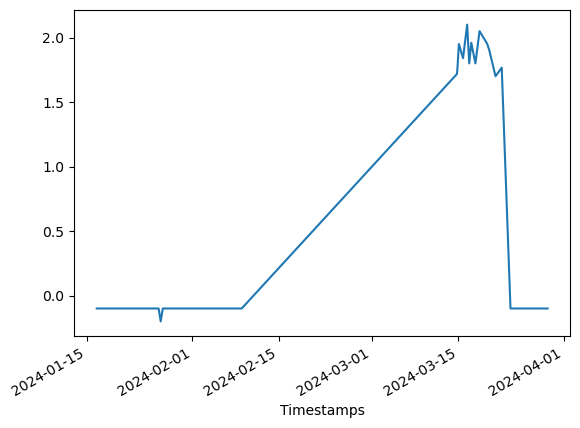

In [54]:
final_df['T1_BB2'].plot()

In [101]:
final_df

,T1_A26BJ1A,T1_A26BJ1B,T1_A26BJ2A,T1_A26BJ2B,T1_A26BTAA,T1_A26BTAB,T1_A26BTI,T1_A26CBJ1,T1_A26CBJ2,T1_BB1,T1_BB2,T1_BBH1,T1_BBL1,T1_CPD,T1_CPR,T1_CTIM,T1_TNH1,T1_TNH2
Timestamps,,,,,,,,,,,,,,,,,,
2024-01-16 14:00:00,34.666667,34.666667,36.666667,36.333333,37.800000,37.000000,35.000000,35.500000,36.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 08:00:00,29.333333,30.285714,31.500000,30.500000,28.885714,32.500000,31.214286,30.500000,31.214286,-0.2,-0.100000,0.0,0.0,-0.005,0.0,-18.0,0.000,0.000
2024-01-24 14:00:00,26.040000,26.200000,28.285714,28.400000,29.333333,28.000000,28.285714,27.000000,30.083333,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-24 22:00:00,28.153846,28.916667,28.611111,28.666667,29.272727,29.125000,26.307692,28.812500,32.166667,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-25 06:00:00,29.333333,29.333333,32.100000,31.500000,31.666667,31.666667,31.000000,29.555556,32.500000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 14:00:00,33.916667,35.800000,37.250000,37.333333,38.111111,38.750000,36.363636,35.687500,36.857143,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000
2024-01-25 22:00:00,33.178571,32.625000,33.900000,32.578947,33.500000,31.318182,31.866667,33.062500,33.421053,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 06:00:00,27.375000,28.375000,29.166667,27.857143,30.666667,28.600000,28.875000,27.000000,29.875000,-0.2,-0.100000,0.0,0.0,-0.010,0.0,-18.0,0.000,0.000
2024-01-26 14:00:00,26.000000,26.000000,27.000000,26.666667,27.333333,27.000000,26.125000,26.250000,30.000000,-0.2,-0.100000,0.0,0.0,0.000,0.0,-18.0,0.000,0.000


### Save combined dataset

In [39]:
final_df.reset_index(drop= True, inplace= True )

In [40]:
final_df.to_csv("../finaldata_time50.csv", header=True)

In [62]:
final_df.corr()

,T1_A26BJ1A,T1_A26BJ1B,T1_A26BJ2A,T1_A26BJ2B,T1_A26BTAA,T1_A26BTAB,T1_A26CBJ1,T1_A26CBJ2,T1_BB1,T1_BB2
T1_A26BJ1A,1.000000,0.997305,0.979368,0.976976,0.974773,0.974062,0.979518,0.975047,0.249630,0.848025
T1_A26BJ1B,0.997305,1.000000,0.983394,0.979233,0.980852,0.980232,0.984992,0.980945,0.244318,0.854265
T1_A26BJ2A,0.979368,0.983394,1.000000,0.998051,0.990198,0.990709,0.981301,0.978942,0.243335,0.847902
T1_A26BJ2B,0.976976,0.979233,0.998051,1.000000,0.986553,0.987212,0.976562,0.973322,0.244180,0.845672
T1_A26BTAA,0.974773,0.980852,0.990198,0.986553,1.000000,0.998983,0.992458,0.993362,0.346056,0.871096
T1_A26BTAB,0.974062,0.980232,0.990709,0.987212,0.998983,1.000000,0.991970,0.992073,0.345156,0.867558
T1_A26CBJ1,0.979518,0.984992,0.981301,0.976562,0.992458,0.991970,1.000000,0.997075,0.364847,0.896167
T1_A26CBJ2,0.975047,0.980945,0.978942,0.973322,0.993362,0.992073,0.997075,1.000000,0.384355,0.899262
T1_BB1,0.249630,0.244318,0.243335,0.244180,0.346056,0.345156,0.364847,0.384355,1.000000,0.544789
T1_BB2,0.848025,0.854265,0.847902,0.845672,0.871096,0.867558,0.896167,0.899262,0.544789,1.000000


In [64]:
import seaborn 

In [70]:
final_df.reset_index(drop=True, inplace=True)

<Axes: >

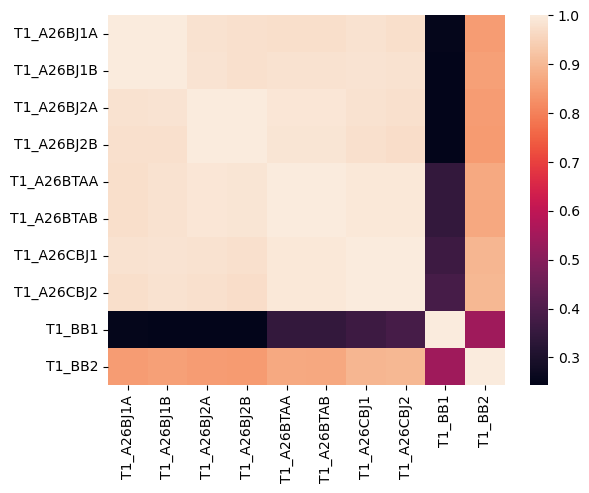

In [74]:
seaborn.heatmap(final_df.corr())